1. get probability of each data points belonging to class 1</br>

Logistic(sigmoid function)</br>
g(z) = 1/(1+e^-z)</br>
z = beta0+betai*xi
</br>
</br>
2. Predict classes based on probability and threshold </br>
</br>
3. To get betas -> Maximum Likelihood Estimation</br>
beta, x, y -> likelihood function </br>
Estimated beta -> maximize likelihood </br>


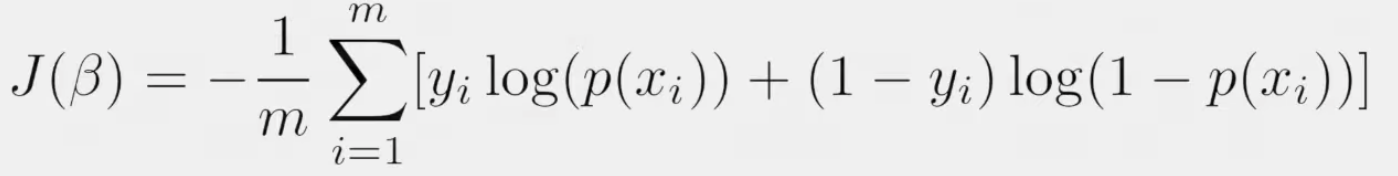

Estimating betas:</br>
</br>
start with a random guess </br>
compute the gradients and update the betas </br>
Repeat the process

#### Implementation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
class LogisticRegression():
    def __init__(self,learning_rate = 0.01, n_iters = 100):
        self.lr = learning_rate
        self.n_iters = n_iters
        
    #write the main fit function first
    def fit(self,X,y):
        self.n_samples, self.n_features = X.shape
        self._init_params()
        
        for i in range(len(X)):
            X[i] = self._normalize(X[i])
        self.X = X
        self.y = y
        
        #gradient Descent
        for i in range(self.n_iters):
            dw,db = self._get_gradients()
            self._update_gradients(dw,db)
    
        
    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0
    
    def _normalize(self,X):
        return (X-X.min())/(X.max()-X.min())
    
    def _get_gradients(self):
        z = self.X.dot(self.weights)+self.bias
        p = 1/(1+np.exp(-(z)))
        
        error = (p-self.y.T)
        error = np.reshape(error,self.n_samples)
        dw = np.dot(self.X.T, error)/self.n_samples
        db = np.sum(error)/self.n_samples
        return dw, db
    
    def _update_gradients(self, dw,db):
        self.weights -= self.lr*dw
        self.bias -= self.lr*db
        
    #predict with testing data
    
    def predict(self,X):
        z = self.X.dot(self.weights)+self.bias
        p = 1/(1+np.exp(-z))
        preds = []
        preds = [1 if i >0.5 else 0 for i in p]
        return preds
    

In [38]:
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "diabetes.csv" )
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
  
  
if __name__ == "__main__" :     
    main()

Accuracy on test set by our model       :   61.111111111111114
Accuracy on test set by sklearn model   :   58.333333333333336
